In [17]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import dynalearn
from matplotlib.lines import Line2D
from dynalearn.utilities import to_nary
from dynalearn.experiments import Experiment
from dynalearn.experiments.metrics import LTPMetrics
from scipy.spatial.distance import jensenshannon


In [34]:
true_c = [dynalearn.utilities.color_pale["blue"], dynalearn.utilities.color_pale["red"], 
          dynalearn.utilities.color_pale["grey"]]
true_ls = "-"
true_mk = "o"
gnn_c = [dynalearn.utilities.color_dark["blue"], dynalearn.utilities.color_dark["red"], 
         dynalearn.utilities.color_dark["grey"]]
gnn_ls = "--"
gnn_mk = "^"


def plot_ltps(experiment, ax=None):
    ax = ax or plt.gca()
    true_m = experiment.metrics["TrueLTPMetrics"]
    gnn_m = experiment.metrics["GNNLTPMetrics"]
    transitions = ([0, 1], [1, 0])
    for i, (t0, t1) in enumerate(transitions):
        x, y, yl, yh = LTPMetrics.aggregate(true_m.data["ltp"], 
                                            true_m.data["summaries"], 
                                            in_state=t0, 
                                            out_state=t1,
                                            axis=1,
                                           )
        ax.plot(x, y, ls=true_ls, color=true_c[i], lw=2)
        ax.fill_between(x, yl, yh, color=true_c[i], alpha=0.2)
    
    for i, (t0, t1) in enumerate(transitions):
        x, y, yl, yh = LTPMetrics.aggregate(gnn_m.data["ltp"], 
                                            gnn_m.data["summaries"], 
                                            in_state=t0, 
                                            out_state=t1,
                                            axis=1,
                                           )
        ax.plot(x, y, ls=gnn_ls, color=gnn_c[i], lw=2)
        ax.fill_between(x, yl, yh, color=gnn_c[i], alpha=0.2)

    return ax

def plot_jsd(experiment, ax=None, color='r', linestyle='-'):
    ax = ax or plt.gca()
    true_m = experiment.metrics["TrueLTPMetrics"]
    gnn_m = experiment.metrics["GNNLTPMetrics"]
    uniform = np.ones(gnn_m.data["ltp"].shape) / experiment.model.num_states
    jsd = LTPMetrics.compare(true_m.data["ltp"],
                             gnn_m.data["ltp"],
                             true_m.data["summaries"],
                             func=jensenshannon)
    x, y, yl, yh = LTPMetrics.aggregate(jsd, 
                                        true_m.data["summaries"], 
                                        axis=-1)
    jsd = LTPMetrics.compare(true_m.data["ltp"],
                             uniform,
                             true_m.data["summaries"],
                             func=jensenshannon)
    x, y_uni, _, _ = LTPMetrics.aggregate(jsd, 
                                        true_m.data["summaries"], 
                                        axis=-1)
    ax.plot(x, y / y_uni, color=color, ls=linestyle, lw=2)
        
    return ax
    

GCN tensor(2306)
SAGE tensor(3330)
GAT tensor(2370)
GraphConv tensor(2438)
DynamicsGAT tensor(2438)


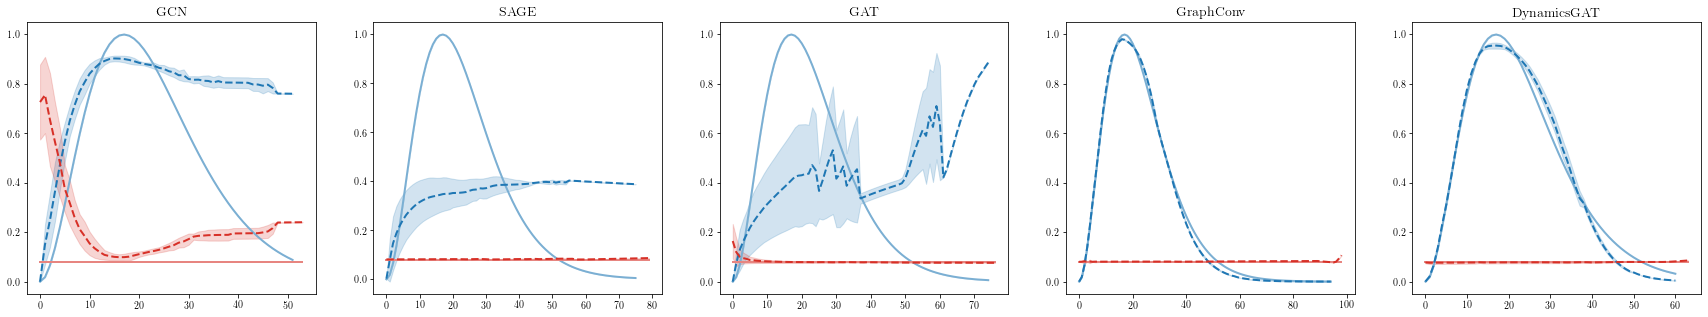

In [41]:
true_colors = [dynalearn.utilities.color_pale["blue"], dynalearn.utilities.color_pale["red"], 
               dynalearn.utilities.color_pale["green"], dynalearn.utilities.color_pale["purple"],
               dynalearn.utilities.color_pale["grey"]]
gnn_colors = [dynalearn.utilities.color_dark["blue"], dynalearn.utilities.color_dark["red"], 
               dynalearn.utilities.color_dark["green"], dynalearn.utilities.color_dark["purple"],
               dynalearn.utilities.color_dark["grey"]]

models = ["GCN", "SAGE", "GAT", "GraphConv", "DynamicsGAT"]
dynamics = "plancksis"
lss = ["-", "--", "-.", "dotted"]

fig, axes = plt.subplots(1, len(models), figsize=(6 * len(models), 5))

for i, m in enumerate(models):
    experiment = Experiment.unzip(f"../data/phase1-data/gnn_layers/summary/{dynamics}-ba-{m}.zip")
    plot_ltps(experiment, ax=axes[i])
    axes[i].set_title(m,fontsize=14)
    print(m, experiment.model.nn.num_parameters())
#     plot_jsd(experiment, color=gnn_colors[i], linestyle=lss[i])
#     plt.yscale('log')
